In [2]:
import pandas as pd
import numpy as np
from matplotlib import rc
import ast
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
import seaborn as sns
import statistics

In [3]:
sns.set(rc={'figure.figsize':(4,4)}, style="ticks", font_scale=1.5)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [60]:
list_conv = lambda x: ast.literal_eval(x)
conv = {'fpr': list_conv,
        'tpr': list_conv,
        'authorized': list_conv,
        'unauthorized': list_conv
       }

df = pd.read_csv("../results/p2_phone_models/phone_iPhone XS Max.csv", converters=conv)
df2 = pd.read_csv("../results/p2_phone_models/subsample_30.csv", converters=conv)
# df3 = pd.read_csv("../results/general/direction_left.csv", converters=conv)
# df4 = pd.read_csv("../results/general/direction_right.csv", converters=conv)

## ROC

In [61]:
bigx_1 = []
bigy_1 = []
bigx_2 = []
bigy_2 = []
bigx_3 = []
bigy_3 = []
bigx_4 = []
bigy_4 = []

for index, row in df.iterrows():
    f = interp1d(row['fpr'],row['tpr'])
    xnew = np.arange(0, 1.005, 0.005)
    ynew = f(xnew)
        
    for i in xnew: 
        bigx_1.append(i)
    for i in ynew: 
        bigy_1.append(i)
        
for index, row in df2.iterrows():
    f = interp1d(row['fpr'],row['tpr'])
    xnew = np.arange(0, 1.005, 0.005)
    ynew = f(xnew)
        
    for i in xnew: 
        bigx_2.append(i)
    for i in ynew: 
        bigy_2.append(i)
        
        
# for index, row in df3.iterrows():
#     f = interp1d(row['fpr'],row['tpr'])
#     xnew = np.arange(0, 1.005, 0.005)
#     ynew = f(xnew)
        
#     for i in xnew: 
#         bigx_3.append(i)
#     for i in ynew: 
#         bigy_3.append(i)
        
# for index, row in df4.iterrows():
#     f = interp1d(row['fpr'],row['tpr'])
#     xnew = np.arange(0, 1.005, 0.005)
#     ynew = f(xnew)
        
#     for i in xnew: 
#         bigx_4.append(i)
#     for i in ynew: 
#         bigy_4.append(i)

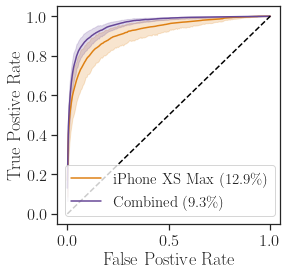

In [62]:
ax = sns.lineplot(x=bigx_1, y=bigy_1, color="#de8013", label="iPhone XS Max (12.9\%)")
ax = sns.lineplot(x=bigx_2, y=bigy_2, color="#664697", label="Combined (9.3\%)")
# ax = sns.lineplot(x=bigx_3, y=bigy_3, color="#3980aa", label="Left (8.4\%)")
# ax = sns.lineplot(x=bigx_4, y=bigy_4, color="#b96dc0", label="Right (16.2\%)")
ax = sns.lineplot(x=[0,1], y=[0,1], color="black", linestyle='--')
ax.legend(fontsize=15)
ax.set(xlabel='False Postive Rate', ylabel='True Postive Rate')
plt.savefig('XS Max_eer.pdf', format='pdf',bbox_inches = 'tight')

# FCS

In [13]:
big_auth_1 = []
big_unauth_1 = []
big_auth_2 = []
big_unauth_2 = []


for index, row in df.iterrows():        
    for i in row['authorized']: 
        big_auth_1.append(i)
        
    for i in row['unauthorized']: 
        big_unauth_1.append(i)

for index, row in df2.iterrows():        
    for i in row['authorized']: 
        big_auth_2.append(i)
        
    for i in row['unauthorized']: 
        big_unauth_2.append(i)

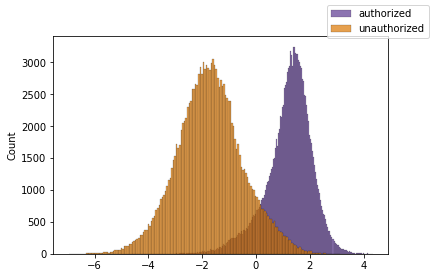

In [19]:
# sns.histplot(data=big_auth_1, color='blue')
# sns.histplot(data=big_unauth_1, color='red')
fig = plt.figure()
sns.histplot(data=big_auth_2, color='#664697')
sns.histplot(data=big_unauth_2, color='#de8013')
fig.legend(labels=['authorized','unauthorized'])